In [105]:
# 이거 실행하고 다시 런타임 시작
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pykrx import stock
sns.set(font='NaNumBarunGothic')

import tensorflow as tf


from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
%matplotlib inline

# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#------------------------------------------------------------------ CART(Classification and Regression Tree)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC, NuSVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor,  AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  #----------------*****


#------------------------------------------------------------------ 증강학습
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE

#------------------------------------------------------------------ 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#------------------------------------------------------------------ 평가관련
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
# MAE
# MSE  : (squared=True)
# RMSE : (squared=False)
# MSLE

#------------------------------------------------------------------ 튜닝관련
# import optuna


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import re
pd.options.display.max_columns = None

In [108]:
baseline2 = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/baseline2.csv')
baseline2['Stock'] = baseline2['Stock'].astype('str')
baseline2['Stock'] = baseline2['Stock'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기



stock_df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/주가지표.csv')

stock_df.head(20)

,Unnamed: 0,날짜,PER,PBR,EPS,DIV,종목코드,종목명,담당,Unnamed: 9
0,3571,2017-12-31,NaN,3.55,NaN,0,060310,3S,이정민,NaN
1,3572,2018-12-31,NaN,2.71,NaN,0,060310,3S,이정민,NaN
2,3573,2019-12-31,NaN,3.11,NaN,0,060310,3S,이정민,NaN
3,3574,2020-12-31,87.34,3.64,32,0,060310,3S,NaN,NaN
4,3575,2021-12-31,NaN,3.03,NaN,0,060310,3S,이정민,NaN
5,4151,2017-12-31,72.45,6.56,412,0,054620,APS홀딩스,NaN,NaN
6,4152,2018-12-31,4.36,0.72,1749,0,054620,APS홀딩스,NaN,NaN
7,4153,2019-12-31,0.09,0.31,46508,0,054620,APS홀딩스,NaN,NaN
8,4154,2020-12-31,162.5,0.94,64,0,054620,APS홀딩스,NaN,NaN
9,4155,2021-12-31,13.97,0.76,10,0.67,054620,APS홀딩스,이정민,NaN


In [109]:
stock_df['EPS'].value_counts()

N        517
53        21
20        20
41        20
16        19
        ... 
-851       1
-811       1
-632       1
-1733      1
1521       1
Name: EPS, Length: 2331, dtype: int64

In [110]:
# stock_df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/주가지표.csv')
# len(stock_df[stock_df['종목코드']=='00000N']['종목명'].unique())

In [111]:
stock_df = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/주가지표.csv')



# 종목코드 00000N 처리
for i in list(stock_df[stock_df['종목코드']=='00000N'].index):
  종목_name = stock_df.loc[i, '종목명']
  종목_code = list(stock_df[(stock_df['종목명']==종목_name) & (stock_df['날짜']=='2021-12-31')]['종목코드'].values).pop()
  stock_df.loc[i, '종목코드'] = 종목_code


# 날짜 연도만 반환
stock_df['날짜'] = stock_df.apply(lambda x: x['날짜'][:4], axis= 1)


# 주가지표 data 전처리
stock_df = stock_df[['날짜', 'PER', 'PBR', 'EPS', 'DIV', '종목코드']]
# 종목카드 6자리로 채워주기
stock_df['종목코드'] = stock_df['종목코드'].astype('str')
stock_df['종목코드'] = stock_df['종목코드'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기
stock_df = stock_df[stock_df['종목코드']!='00000N'].reset_index(drop=True)


# N으로 문자형으로 되어있는 것 np.nan으로 replace
# 쉼표있는거 공백으로 처리
stock_df = stock_df.replace('N', np.nan, regex = True)
stock_df = stock_df.replace(',', '', regex = True)

for i in stock_df.columns[1:5]:
  
  stock_df[i] = stock_df[i].astype('float')

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6210 entries, 0 to 6209
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6210 non-null   object 
 1   PER     4657 non-null   float64
 2   PBR     5675 non-null   float64
 3   EPS     5681 non-null   float64
 4   DIV     5549 non-null   float64
 5   종목코드    6210 non-null   object 
dtypes: float64(4), object(2)
memory usage: 291.2+ KB


In [112]:
# EPS 성장률로 변환
new_stock_df = pd.DataFrame()
for i in list(stock_df['종목코드'].unique()):
  tmp = stock_df[stock_df['종목코드']==i]
  tmp['EPS성장률'] = tmp['EPS'].pct_change()
  new_stock_df = pd.concat([new_stock_df,tmp], axis=0)
  new_stock_df = new_stock_df.reset_index(drop= True)

new_stock_df

,날짜,PER,PBR,EPS,DIV,종목코드,EPS성장률
0,2017,NaN,3.55,NaN,0.00,060310,NaN
1,2018,NaN,2.71,NaN,0.00,060310,NaN
2,2019,NaN,3.11,NaN,0.00,060310,NaN
3,2020,87.34,3.64,32.0,0.00,060310,NaN
4,2021,NaN,3.03,NaN,0.00,060310,0.000000
...,...,...,...,...,...,...,...
6205,2017,21.41,6.13,1541.0,0.00,238490,NaN
6206,2018,15.28,4.38,1541.0,0.00,238490,0.000000
6207,2019,3.65,0.97,2623.0,2.09,238490,0.702141
6208,2020,8.42,2.94,1521.0,1.17,238490,-0.420130


In [113]:
print(new_stock_df['EPS'].isna().sum())
print(new_stock_df['EPS성장률'].isna().sum())

529
1767


### 주가지표 연도별로 나누기

In [114]:
# 주가지표 연도별로 나누기
stock_df_2018 = new_stock_df[new_stock_df['날짜']=='2018']
stock_df_2019 = new_stock_df[new_stock_df['날짜']=='2019']
stock_df_2020 = new_stock_df[new_stock_df['날짜']=='2020']
stock_df_2021 = new_stock_df[new_stock_df['날짜']=='2021']

In [115]:
stock_df_2018

,날짜,PER,PBR,EPS,DIV,종목코드,EPS성장률
1,2018,NaN,2.71,NaN,0.00,060310,NaN
6,2018,4.36,0.72,1749.0,0.00,054620,3.245146
11,2018,13.14,3.09,1651.0,0.69,265520,0.104348
16,2018,17.74,1.56,473.0,0.00,211270,-0.476770
21,2018,73.61,1.02,36.0,0.00,013720,-0.320755
...,...,...,...,...,...,...,...
6186,2018,18.40,0.60,150.0,3.62,024060,-0.257426
6191,2018,12.18,0.89,587.0,2.10,010240,1.563319
6196,2018,19.22,1.21,475.0,1.10,189980,-0.565814
6201,2018,27.54,1.31,167.0,2.17,037440,-0.411972


# 1. 기존 baseline2.csv에 concat

In [116]:
# baseline2 csv 연도별로 나눠주기 
baseline_2018 = baseline2.loc[0:1278,:].reset_index(drop=True)
baseline_2019 = baseline2.loc[1279:2557,:].reset_index(drop=True)
baseline_2020 = baseline2.loc[2558:3836,:].reset_index(drop=True)
baseline_2021 = baseline2.loc[3837:,:].reset_index(drop=True)


# merge작업
baseline_2018 = pd.merge(baseline_2018, stock_df_2018, how='left', left_on = 'Stock', right_on = '종목코드')
baseline_2019 = pd.merge(baseline_2019, stock_df_2019, how='left', left_on = 'Stock', right_on = '종목코드')
baseline_2020 = pd.merge(baseline_2020, stock_df_2020, how='left', left_on = 'Stock', right_on = '종목코드')
baseline_2021 = pd.merge(baseline_2021, stock_df_2021, how='left', left_on = 'Stock', right_on = '종목코드')

In [117]:
print(baseline_2018.shape)
print(baseline_2019.shape)
print(baseline_2020.shape)
print(baseline_2021.shape)

(1279, 47)
(1279, 47)
(1279, 47)
(1279, 47)


In [118]:
baseline_2018['날짜'].fillna('2018', inplace = True)
baseline_2019['날짜'].fillna('2019', inplace = True)
baseline_2020['날짜'].fillna('2020', inplace = True)
baseline_2021['날짜'].fillna('2021', inplace = True)

# 2. 결측치 처리 - 회귀
- 회귀로 채우기
- PER, PBR, EPS, DIV 중 널값인 것은 test data로, 값이 있는 것은 train 데이터로 활용

### PER
- PER만 대상으로 진행
- train 데이터로 0.8 : train, 0.2 : validation
- 어떤 회귀 모델이 좋은지 확인
- 어떤 스케일링이 좋은지 확인
- 타겟값은 hist() 찍어본 결과 로그스케일링 필요

In [119]:
concat_df = pd.concat([baseline_2018, baseline_2019, baseline_2020, baseline_2021], axis=0)
concat_df.reset_index(drop=True, inplace=True)

target_col = ['PER', 'PBR', 'EPS', 'DIV']
x_col = ['영업활동으로인한현금흐름', '총자본회전율', '매출액영업이익율']

# PER 널값 채우기
concat_df[concat_df['PER'].isnull()] # test data
concat_df[concat_df['PER'].notnull()] # train data
train_idx = list(concat_df[concat_df['PER'].notnull()].index)
test_idx = list(concat_df[concat_df['PER'].isnull()].index)

train_X_data = concat_df.loc[train_idx, x_col]
train_y_data = concat_df.loc[train_idx, 'PER']


test_X_data = concat_df.loc[test_idx, x_col]
test_y_data = concat_df.loc[test_idx, 'PER']

In [120]:
train_X_data

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
132,4.752823e+09,0.36,23.55
134,6.503544e+09,2.17,4.89
135,4.234305e+09,0.63,21.22
136,1.727388e+10,1.52,7.58
138,7.973515e+09,2.10,11.72
...,...,...,...
5110,-1.196732e+09,1.00,3.68
5112,-2.713149e+09,1.64,3.24
5113,2.652719e+09,0.78,-1.31
5114,6.462723e+09,1.62,6.38


In [121]:
train_y_data

132     55.05
134      4.65
135     68.75
136     21.20
138     39.83
        ...  
5110    55.19
5112     4.12
5113     7.88
5114    13.51
5115    17.31
Name: PER, Length: 3804, dtype: float64

In [122]:
# 그냥 점수내보기
def my_eval(X, y , models, plot_view=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    for (name, model) in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        #-----------------------------------------
        mse  = mean_squared_error(y_test, pred, squared=True)
        rmse = mean_squared_error(y_test, pred, squared=False)
        #-----------------------------------------
        
        print(f"{name} : RMSE:{rmse:.4f}  MSE:{mse:.4f} ")

        if plot_view == True:
            if model.__class__.__name__ == "DecisionTreeRegressor":
                s = pd.Series(model.feature_importances_, index=X.columns)
                s.plot.bar()
                plt.show()
                plt.close()

            else:
                print(f"{model.coef_} {model.intercept_}")
                s = pd.Series(model.coef_, index=X.columns)
                s.plot.bar()
                plt.show()
                plt.close()


#### 스탠다드 스케일링
- 스케일링 이후 인덱스값이 초기화됐다. (주의 요함)

In [123]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,-0.206753,-0.789543,0.509362
1,-0.151182,2.866392,-0.011423
2,-0.223212,-0.244182,0.444333
3,0.190686,1.553487,0.063653
4,-0.104523,2.725002,0.179197
...,...,...,...
3799,-0.395602,0.503163,-0.045193
3800,-0.443735,1.795869,-0.057473
3801,-0.273414,0.058796,-0.184459
3802,-0.152478,1.755472,0.030162


In [124]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)
#-------------------------------------------------

LR : RMSE:1.1556  MSE:1.3355 
DT : RMSE:1.5646  MSE:2.4479 
RIDGE : RMSE:1.1556  MSE:1.3355 
LASSO : RMSE:1.1579  MSE:1.3407 
RandomForestRegressor : RMSE:1.1650  MSE:1.3573 


#### MinMaxScaler

In [125]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,0.214216,0.069170,0.948469
1,0.216396,0.426877,0.933568
2,0.213570,0.122530,0.946608
3,0.229807,0.298419,0.935716
4,0.218226,0.413043,0.939022
...,...,...,...
3799,0.206807,0.195652,0.932601
3800,0.204919,0.322134,0.932250
3801,0.211601,0.152174,0.928616
3802,0.216345,0.318182,0.934757


In [126]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)

LR : RMSE:1.1556  MSE:1.3355 
DT : RMSE:1.6054  MSE:2.5774 
RIDGE : RMSE:1.1562  MSE:1.3369 
LASSO : RMSE:1.1579  MSE:1.3407 
RandomForestRegressor : RMSE:1.1660  MSE:1.3595 


#### RobustScaler

In [127]:
scaler = RobustScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,-0.024871,-0.537037,1.585759
1,0.104765,2.814815,-0.085535
2,-0.063266,-0.037037,1.377071
3,0.902282,1.611111,0.155396
4,0.213613,2.685185,0.526198
...,...,...,...
3799,-0.465421,0.648148,-0.193910
3800,-0.577708,1.833333,-0.233318
3801,-0.180379,0.240741,-0.640842
3802,0.101743,1.796296,0.047918


In [128]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)

LR : RMSE:1.1556  MSE:1.3355 
DT : RMSE:1.5877  MSE:2.5207 
RIDGE : RMSE:1.1556  MSE:1.3355 
LASSO : RMSE:1.1579  MSE:1.3407 
RandomForestRegressor : RMSE:1.1653  MSE:1.3578 


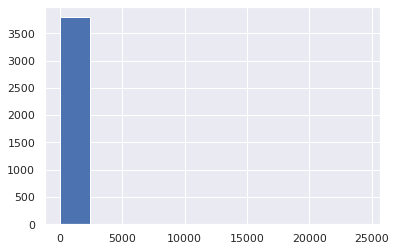

In [129]:
train_y_data.hist()

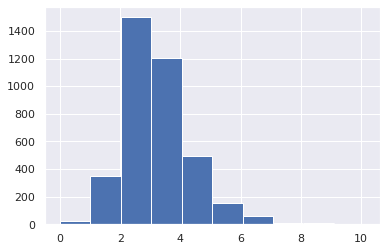

In [130]:
np.log1p(train_y_data).hist()

### PBR

In [131]:
concat_df = pd.concat([baseline_2018, baseline_2019, baseline_2020, baseline_2021], axis=0)
concat_df.reset_index(drop=True, inplace=True)

target_col = ['PER', 'PBR', 'EPS', 'DIV']
x_col = ['영업활동으로인한현금흐름', '총자본회전율', '매출액영업이익율']

# PER 널값 채우기
concat_df[concat_df['PBR'].isnull()] # test data
concat_df[concat_df['PBR'].notnull()] # train data
train_idx = list(concat_df[concat_df['PBR'].notnull()].index)
test_idx = list(concat_df[concat_df['PBR'].isnull()].index)

train_X_data = concat_df.loc[train_idx, x_col]
train_y_data = concat_df.loc[train_idx, 'PBR']


test_X_data = concat_df.loc[test_idx, x_col]
test_y_data = concat_df.loc[test_idx, 'PBR']

In [132]:
train_X_data

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
132,4.752823e+09,0.36,23.55
134,6.503544e+09,2.17,4.89
135,4.234305e+09,0.63,21.22
136,1.727388e+10,1.52,7.58
137,-2.161233e+09,0.25,-218.42
...,...,...,...
5110,-1.196732e+09,1.00,3.68
5112,-2.713149e+09,1.64,3.24
5113,2.652719e+09,0.78,-1.31
5114,6.462723e+09,1.62,6.38


In [133]:
train_y_data

132       5.92
134       3.53
135       8.03
136       2.44
137     223.68
         ...  
5110      0.93
5112      1.52
5113      1.34
5114      2.13
5115      0.99
Name: PBR, Length: 4657, dtype: float64

#### 스탠다드 스케일링
- 스케일링 이후 인덱스값이 초기화됐다. (주의 요함)

In [134]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,-0.146653,-0.693157,0.234614
1,-0.087192,2.984250,0.098245
2,-0.164264,-0.144593,0.217586
3,0.278608,1.663634,0.117904
4,-0.381480,-0.916646,-1.533722
...,...,...,...
4652,-0.348722,0.607142,0.089402
4653,-0.400225,1.907440,0.086187
4654,-0.217980,0.160164,0.052935
4655,-0.088579,1.866806,0.109134


In [135]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)
#-------------------------------------------------

LR : RMSE:0.6123  MSE:0.3749 
DT : RMSE:0.8091  MSE:0.6547 
RIDGE : RMSE:0.6123  MSE:0.3749 
LASSO : RMSE:0.6175  MSE:0.3813 
RandomForestRegressor : RMSE:0.5600  MSE:0.3136 


#### MinMaxScaler

In [136]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,0.214216,0.069170,0.986305
1,0.216396,0.426877,0.982345
2,0.213570,0.122530,0.985811
3,0.229807,0.298419,0.982916
4,0.205606,0.047431,0.934953
...,...,...,...
4652,0.206807,0.195652,0.982088
4653,0.204919,0.322134,0.981995
4654,0.211601,0.152174,0.981029
4655,0.216345,0.318182,0.982661


In [137]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)

LR : RMSE:0.6123  MSE:0.3749 
DT : RMSE:0.8013  MSE:0.6422 
RIDGE : RMSE:0.6046  MSE:0.3656 
LASSO : RMSE:0.6175  MSE:0.3813 
RandomForestRegressor : RMSE:0.5600  MSE:0.3136 


#### RobustScaler

In [138]:
scaler = RobustScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,0.083291,-0.444444,1.603506
1,0.220841,2.907407,0.045910
2,0.042552,0.055556,1.409015
3,1.067041,1.703704,0.270451
4,-0.459930,-0.648148,-18.594324
...,...,...,...
4652,-0.384152,0.740741,-0.055092
4653,-0.503293,1.925926,-0.091820
4654,-0.081709,0.333333,-0.471619
4655,0.217634,1.888889,0.170284


In [139]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df,np.log1p(train_y_data) , models)

LR : RMSE:0.6123  MSE:0.3749 
DT : RMSE:0.8522  MSE:0.7263 
RIDGE : RMSE:0.6123  MSE:0.3749 
LASSO : RMSE:0.6078  MSE:0.3694 
RandomForestRegressor : RMSE:0.5631  MSE:0.3170 


### EPS

In [140]:
concat_df = pd.concat([baseline_2018, baseline_2019, baseline_2020, baseline_2021], axis=0)
concat_df.reset_index(drop=True, inplace=True)

target_col = ['PER', 'PBR', 'EPS', 'DIV']
x_col = ['영업활동으로인한현금흐름', '총자본회전율', '매출액영업이익율']

# PER 널값 채우기
concat_df[concat_df['EPS'].isnull()] # test data
concat_df[concat_df['EPS'].notnull()] # train data
train_idx = list(concat_df[concat_df['EPS'].notnull()].index)
test_idx = list(concat_df[concat_df['EPS'].isnull()].index)

train_X_data = concat_df.loc[train_idx, x_col]
train_y_data = concat_df.loc[train_idx, 'EPS']


test_X_data = concat_df.loc[test_idx, x_col]
test_y_data = concat_df.loc[test_idx, 'EPS']

In [141]:
train_X_data

,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
132,4.752823e+09,0.36,23.55
133,4.178418e+09,0.62,9.58
134,6.503544e+09,2.17,4.89
135,4.234305e+09,0.63,21.22
136,1.727388e+10,1.52,7.58
...,...,...,...
5110,-1.196732e+09,1.00,3.68
5112,-2.713149e+09,1.64,3.24
5113,2.652719e+09,0.78,-1.31
5114,6.462723e+09,1.62,6.38


In [142]:
train_y_data

132      663.0
133       60.0
134     2268.0
135      136.0
136      368.0
         ...  
5110       5.0
5112     464.0
5113     115.0
5114     525.0
5115     499.0
Name: EPS, Length: 4656, dtype: float64

#### 스탠다드 스케일링
- 스케일링 이후 인덱스값이 초기화됐다. (주의 요함)

In [143]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(train_X_data[x_col])
X_scaler_df = pd.DataFrame(X_scaler
                           , columns=x_col)
X_scaler_df




,영업활동으로인한현금흐름,총자본회전율,매출액영업이익율
0,-0.146797,-0.692779,0.234456
1,-0.166304,-0.166200,0.132375
2,-0.087343,2.973021,0.098104
3,-0.164406,-0.145947,0.217431
4,0.278419,1.656573,0.117761
...,...,...,...
4651,-0.348845,0.603415,0.089263
4652,-0.400343,1.899610,0.086048
4653,-0.218117,0.157848,0.052800
4654,-0.088729,1.859103,0.108992


In [144]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge(random_state=1234)), 
           ("LASSO", Lasso(random_state=1234)),
          ("RandomForestRegressor", RandomForestRegressor(ccp_alpha = 0.001, random_state=1234))
         ]
# y = df_train["count"]
# X = df_train.drop(["count"], axis=1)
#-------------------------------------------------

my_eval(X_scaler_df, np.log1p(train_y_data) , models)
#-------------------------------------------------

ValueError: ignored

In [145]:
train_y_data[np.log1p(train_y_data).isnull()]

137     -740.0
151     -341.0
153     -192.0
157     -259.0
162      -48.0
         ...  
5092   -2183.0
5096     -16.0
5098    -580.0
5104     -20.0
5107    -619.0
Name: EPS, Length: 835, dtype: float64

# 회귀로 채우는걸 멈춘이유
- 1. loss 값이 너무 높게 나온다.
- 2. 타겟값에 음수가 나와 로그스케일링 진행이 안된다.

## 결측치 처리 - 클러스터링
- 영업활동으로인한현금흐름, 총자본회전율, 매출액영업이익율로 클러스터링 진행
- 클러스터링 진행 이전에 수치 Z-score 정규화(유클리디안 거리를 토대로 진행할 것이기 때문에)

In [146]:
baseline_2019

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실,날짜,PER,PBR,EPS,DIV,종목코드,EPS성장률
0,389500,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,0.0,0.0,2.0,0.0,0.0,0.000000,3.0,0.100115,0.0,8.665832,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,1,0,0,2019,NaN,NaN,NaN,NaN,NaN,NaN
1,296640,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,1.0,3.0,2.0,4.0,2.0,0.000000,3.0,0.000753,2.0,18.460090,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN
2,417970,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,2.0,3.0,2.0,5.0,2.0,0.000000,3.0,0.000377,1.0,27.279234,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN
3,314140,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001132,1.0,21.158629,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN
4,129920,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,1.0,2.0,2.0,3.0,1.0,0.000000,3.0,0.001027,1.0,21.683563,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,0.36,3.69,-9.68,2.30,-0.17,-0.62,-0.59,8.09,47.20,111.87,100.17,0.28,0.61,-1.268170e+08,3.725843e+09,1.0,1.0,2.0,1.0,1.0,3.942799,0.0,0.002129,1.0,16.240915,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1,2019,NaN,NaN,NaN,NaN,NaN,NaN
1275,046970,-0.43,-19.09,217.55,0.32,-11.97,-67.22,-8.47,0.23,39.08,155.90,126.44,1.41,3.24,-8.603656e+09,1.597561e+09,1.0,1.0,2.0,1.0,1.0,1.650250,2.0,0.014925,1.0,15.784827,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,3,1,1,0,2019,NaN,1.51,-357.0,0.00,046970,-30.750000
1276,113810,2.65,9.68,6.59,3.77,3.12,13.36,5.49,6.63,41.25,142.41,78.82,0.57,1.42,2.180337e+09,2.726582e+09,2.0,1.0,2.0,3.0,2.0,0.746953,2.0,0.001837,1.0,16.460994,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3,1,1,1,2019,NaN,0.50,-91.0,0.00,113810,-1.858491
1277,155650,-27.33,-6.80,-29.90,-3.49,-1.69,-25.00,-1.54,-3.18,64.23,55.70,746.97,1.10,1.96,-2.496629e+09,-1.223279e+10,0.0,3.0,2.0,0.0,0.0,3.499731,0.0,0.000594,0.0,27.441614,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0,2019,6.59,1.55,886.0,5.14,155650,-0.098678


In [147]:
print(concat_df['PER'].isna().sum())
print(concat_df['PBR'].isna().sum())
print(concat_df['EPS'].isna().sum())
print(concat_df['DIV'].isna().sum())
print(concat_df['EPS성장률'].isna().sum())

1312
459
460
584
673


### 2.1. KNN - imputer

In [148]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2)

concat_df = pd.concat([baseline_2018, baseline_2019, baseline_2020, baseline_2021], axis=0)
concat_df.reset_index(drop=True, inplace=True)
concat_df['종목코드'] = concat_df['Stock']
concat_df['EPS성장률'].replace(np.inf, np.nan, inplace=True)
concat_df['EPS성장률'].replace(-np.inf, np.nan, inplace=True)

knn_imputer_df = pd.DataFrame()
for i in list(concat_df['종목코드'].unique()):
  tmp = concat_df[concat_df['종목코드'] ==i][['PER', 'PBR', 'EPS', 'DIV', 'EPS성장률']]
  tmp_filled = imputer.fit_transform(tmp)
  tmp_filled = pd.DataFrame(tmp_filled)
  tmp_filled['종목코드'] = i
  knn_imputer_df = pd.concat([knn_imputer_df, tmp_filled], axis=0)

# knn_imputer_df.columns = ['PER', 'PBR', 'EPS', 'DIV', '종목코드']
knn_imputer_df.columns = ['종목코드', 'PER', 'PBR', 'EPS', 'DIV', 'EPS성장률']
knn_imputer_df.head(10)


,종목코드,PER,PBR,EPS,DIV,EPS성장률
0,389500,NaN,NaN,NaN,NaN,NaN
1,389500,NaN,NaN,NaN,NaN,NaN
2,389500,NaN,NaN,NaN,NaN,NaN
3,389500,NaN,NaN,NaN,NaN,NaN
0,296640,NaN,NaN,NaN,NaN,NaN
1,296640,NaN,NaN,NaN,NaN,NaN
2,296640,NaN,NaN,NaN,NaN,NaN
3,296640,NaN,NaN,NaN,NaN,NaN
0,417970,NaN,NaN,NaN,NaN,NaN
1,417970,NaN,NaN,NaN,NaN,NaN


In [149]:
new_knn_imputer_df = pd.concat([knn_imputer_df.loc[0], knn_imputer_df.loc[1], knn_imputer_df.loc[2], knn_imputer_df.loc[3]], axis=0)
new_knn_imputer_df.reset_index(drop = True, inplace=True)
new_knn_imputer_df

,종목코드,PER,PBR,EPS,DIV,EPS성장률
0,389500,NaN,NaN,NaN,NaN,NaN
1,296640,NaN,NaN,NaN,NaN,NaN
2,417970,NaN,NaN,NaN,NaN,NaN
3,314140,NaN,NaN,NaN,NaN,NaN
4,129920,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5111,950110,NaN,NaN,NaN,NaN,NaN
5112,046970,4.12,1.52,464.0,0.00,-2.506494
5113,113810,7.88,1.34,115.0,0.00,-1.618280
5114,155650,13.51,2.13,525.0,0.00,-0.354244


In [151]:
new_knn_imputer_df.isna().sum()

종목코드        0
PER       148
PBR       148
EPS       156
DIV       184
EPS성장률    688
dtype: int64

In [152]:
new_knn_imputer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목코드    5116 non-null   object 
 1   PER     4968 non-null   float64
 2   PBR     4968 non-null   float64
 3   EPS     4960 non-null   float64
 4   DIV     4932 non-null   float64
 5   EPS성장률  4428 non-null   float64
dtypes: float64(5), object(1)
memory usage: 239.9+ KB


In [153]:
new_knn_imputer_df.tail(30)

,종목코드,PER,PBR,EPS,DIV,EPS성장률
5086,115480,22.87,0.91,-392.0,0.000000,-4.500000
5087,139670,5720.00,30.85,5.0,0.000000,-0.972376
5088,121800,4.96,1.10,4876.0,0.000000,0.896538
5089,138070,17.44,0.60,275.0,1.460000,-0.238227
5090,123570,12.72,1.56,322.0,0.730000,0.694737
5091,122870,0.00,2.38,0.0,0.000000,-1.000000
5092,089530,9.43,2.02,-2183.0,0.000000,-39.298246
5093,089030,40.84,2.63,584.0,0.960000,-0.464711
5094,007820,32.05,1.87,229.0,0.950000,2.013158
5095,101240,11.11,1.37,659.0,2.320000,0.297244


In [154]:
concat_df['PER'] = new_knn_imputer_df['PER']
concat_df['PBR'] = new_knn_imputer_df['PBR']
concat_df['EPS'] = new_knn_imputer_df['EPS']
concat_df['DIV'] = new_knn_imputer_df['DIV']
concat_df['EPS성장률'] = new_knn_imputer_df['EPS성장률']
concat_df

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실,날짜,PER,PBR,EPS,DIV,종목코드,EPS성장률
0,389500,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,2.0,1.0,2.0,0.0,1.0,0.000000,3.0,0.023564,1.0,14.593801,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0,2018,NaN,NaN,NaN,NaN,389500,NaN
1,296640,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,1.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.006766,1.0,17.328700,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1,2018,NaN,NaN,NaN,NaN,296640,NaN
2,417970,23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,2.0,2.0,2.0,5.0,2.0,0.000000,3.0,0.000343,1.0,26.200702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2018,NaN,NaN,NaN,NaN,417970,NaN
3,314140,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,1.0,3.0,2.0,3.0,2.0,0.000000,3.0,0.000461,1.0,21.578064,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2018,NaN,NaN,NaN,NaN,314140,NaN
4,129920,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001602,1.0,20.705556,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2018,NaN,NaN,NaN,NaN,129920,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,950110,78.37,-3.08,-3.40,0.92,3.84,34.32,23.90,5.72,17.63,467.08,117.88,0.16,0.70,7.052749e+09,-8.972330e+10,1.0,0.0,1.0,4.0,1.0,0.965841,2.0,0.005466,1.0,15.903376,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1,2021,NaN,NaN,NaN,NaN,950110,NaN
5112,046970,2.98,99.94,-0.77,5.31,22.63,88.70,13.82,3.24,64.99,53.87,154.51,1.64,3.31,1.335246e+10,-2.713149e+09,1.0,2.0,2.0,4.0,1.0,3.323928,0.0,0.000051,1.0,15.822916,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,3,1,1,1,2021,4.12,1.52,464.0,0.00,046970,-2.506494
5113,113810,-1.44,-4.48,-0.65,-1.02,0.04,0.16,0.05,-1.31,32.45,208.15,24.23,0.78,2.38,2.625700e+07,2.652719e+09,0.0,1.0,2.0,2.0,2.0,0.806495,2.0,0.002698,1.0,14.801748,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3,1,0,1,2021,7.88,1.34,115.0,0.00,113810,-1.618280
5114,155650,4.66,7.88,22.56,10.32,8.13,89.91,5.03,6.38,80.72,23.88,897.93,1.62,2.03,8.979293e+09,6.462723e+09,2.0,3.0,2.0,3.0,2.0,7.915767,0.0,0.000030,1.0,31.194817,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1,2021,13.51,2.13,525.0,0.00,155650,-0.354244


In [155]:
print(concat_df['PER'].isna().sum())
print(concat_df['PBR'].isna().sum())
print(concat_df['EPS'].isna().sum())
print(concat_df['DIV'].isna().sum())
print(concat_df['EPS성장률'].isna().sum())

148
148
156
184
688


### 2.2 클러스터링 후 군집별 평균값으로 채워주기



In [156]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=15)

def make_cluster(df):

  # 클러스터링을 위해 기업의 규모를 알 수 있는 3개 변수 뽑아내기
  tmp = df[['영업활동으로인한현금흐름', '총자본회전율', '매출액영업이익율', '업종']]
  
  
  import scipy.stats as ss
  # z - 점수 표준화
  for i in tmp.columns:
    tmp[i] = ss.zscore(tmp[i])
  
  
  model.fit(tmp)
  df['cluster'] = model.labels_
  
  
  return df


new_concat_df = make_cluster(concat_df)

In [157]:
new_concat_df['업종'].value_counts()

2.0    3408
1.0     840
5.0     352
6.0     276
3.0     232
4.0       8
Name: 업종, dtype: int64

In [158]:
new_concat_df['cluster'].value_counts()

13    1324
11    1064
0      880
3      547
5      436
6      291
8      236
2      168
9       56
4       47
7       34
12      14
10      10
1        6
14       3
Name: cluster, dtype: int64

In [159]:
new_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock                  5116 non-null   object 
 1   총자산증가율                 5116 non-null   float64
 2   자기자본증가율                5116 non-null   float64
 3   매출액증가율                 5116 non-null   float64
 4   총자본영업이익율               5116 non-null   float64
 5   총자본순이익율                5116 non-null   float64
 6   자본금순이익율                5116 non-null   float64
 7   매출액순이익율                5116 non-null   float64
 8   매출액영업이익율               5116 non-null   float64
 9   자기자본비율                 5116 non-null   float64
 10  부채비율                   5116 non-null   float64
 11  유보액/납입자본비율             5116 non-null   float64
 12  총자본회전율                 5116 non-null   float64
 13  자기자본회전율                5116 non-null   float64
 14   당기순이익(손실)             5116 non-null   float64
 15  영업활동

In [160]:
new_concat_df['PER'].fillna(new_concat_df.groupby('cluster')['PER'].transform('mean'), inplace=True)
new_concat_df['PBR'].fillna(new_concat_df.groupby('cluster')['PBR'].transform('mean'), inplace=True)
new_concat_df['EPS'].fillna(new_concat_df.groupby('cluster')['EPS'].transform('mean'), inplace=True)
new_concat_df['DIV'].fillna(new_concat_df.groupby('cluster')['DIV'].transform('mean'), inplace=True)
new_concat_df['EPS성장률'].fillna(new_concat_df.groupby('cluster')['EPS성장률'].transform('mean'), inplace=True)

In [161]:
new_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock                  5116 non-null   object 
 1   총자산증가율                 5116 non-null   float64
 2   자기자본증가율                5116 non-null   float64
 3   매출액증가율                 5116 non-null   float64
 4   총자본영업이익율               5116 non-null   float64
 5   총자본순이익율                5116 non-null   float64
 6   자본금순이익율                5116 non-null   float64
 7   매출액순이익율                5116 non-null   float64
 8   매출액영업이익율               5116 non-null   float64
 9   자기자본비율                 5116 non-null   float64
 10  부채비율                   5116 non-null   float64
 11  유보액/납입자본비율             5116 non-null   float64
 12  총자본회전율                 5116 non-null   float64
 13  자기자본회전율                5116 non-null   float64
 14   당기순이익(손실)             5116 non-null   float64
 15  영업활동

In [162]:
new_concat_df.drop(['종목코드', 'cluster'], axis=1, inplace=True)
new_concat_df.to_csv('baseline3.csv', index=False)

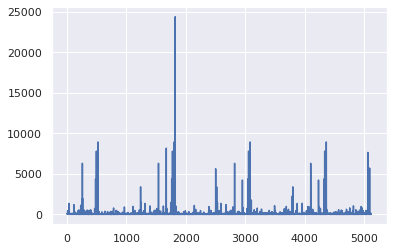

In [163]:
new_concat_df['PER'].plot()

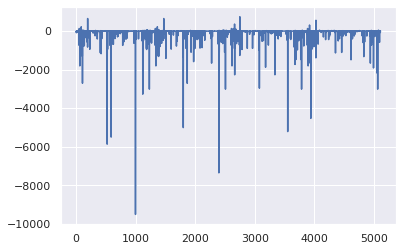

In [164]:
new_concat_df['PBR'].plot()

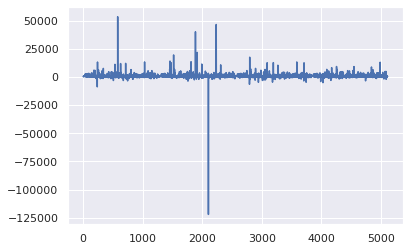

In [165]:
new_concat_df['EPS'].plot()

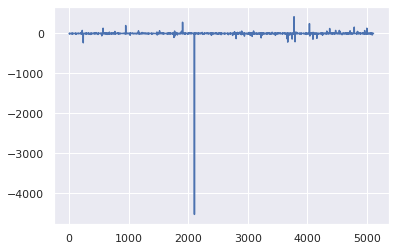

In [167]:
new_concat_df['EPS성장률'].plot()

In [166]:
new_concat_df[new_concat_df['EPS성장률']<-4000]

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실,날짜,PER,PBR,EPS,DIV,EPS성장률
2105,064520,-0.63,154.06,-57.53,-18.72,-16.02,-41.92,-31.23,-36.49,49.63,101.49,48.6,0.51,1.49,-1.233122e+10,575075000.0,0.0,1.0,2.0,0.0,1.0,0.228868,2.0,0.003172,1.0,15.315171,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,3,1,0,0,2019,72.2,0.74,-122105.0,0.0,-4523.407407


In [ ]:
new_concat_df[new_concat_df['Stock']=='064520']

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실,날짜,PER,PBR,EPS,DIV,EPS성장률
826,064520,-16.93,-64.04,-44.82,-26.45,-34.15,-87.51,-31.26,-24.21,19.41,415.17,-54.84,1.09,3.28,-2.906086e+10,-1.498870e+08,0.0,0.0,2.0,0.0,0.0,0.111778,2.0,0.075565,0.0,14.467917,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,3,1,0,0,2018,60.0,60.0,60.0,0.0,-0.706522
2105,064520,-0.63,154.06,-57.53,-18.72,-16.02,-41.92,-31.23,-36.49,49.63,101.49,48.60,0.51,1.49,-1.233122e+10,5.750750e+08,0.0,1.0,2.0,0.0,1.0,0.228868,2.0,0.003172,1.0,15.315171,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,3,1,0,0,2019,72.2,72.2,72.2,0.0,-4523.407407
3384,064520,-40.82,-0.64,-41.95,-9.54,-20.62,-40.31,-54.94,-25.42,83.32,20.01,2.70,0.38,0.60,-1.259224e+10,-1.531701e+10,0.0,2.0,2.0,0.0,0.0,5.702042,0.0,0.004053,0.0,13.443537,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,3,1,0,0,2020,72.2,72.2,72.2,0.0,-0.983932
4663,064520,40.08,19.39,83.14,1.87,1.37,1.89,1.77,2.43,71.02,40.81,7.97,0.77,1.01,7.448150e+08,-1.088234e+10,2.0,2.0,2.0,3.0,1.0,3.412411,0.0,0.000204,1.0,17.018068,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,3,1,1,1,2021,84.4,84.4,84.4,0.0,-1.053517


In [ ]:
# EPS 성장률은 클러스터로 채워져서그런가 이상하다.

In [ ]:
df_2018 = baseline2.loc[0:1278,:]
df_2018

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실
0,389500,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,2.0,1.0,2.0,0.0,1.0,0.000000,3.0,0.023564,1.0,14.593801,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0
1,296640,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,1.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.006766,1.0,17.328700,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
2,417970,23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,2.0,2.0,2.0,5.0,2.0,0.000000,3.0,0.000343,1.0,26.200702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
3,314140,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,1.0,3.0,2.0,3.0,2.0,0.000000,3.0,0.000461,1.0,21.578064,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
4,129920,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001602,1.0,20.705556,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,950110,146.31,77.94,10.83,8.05,7.49,24.84,16.69,17.92,45.68,118.91,93.99,0.45,0.88,3.963095e+09,2.682301e+09,2.0,1.0,2.0,5.0,2.0,2.995899,0.0,0.002614,1.0,18.371803,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
1275,46970,42.14,8.83,92.45,4.43,-0.55,-2.82,-1.06,8.50,48.09,107.95,194.50,0.52,0.96,-3.391840e+08,2.333764e+09,2.0,1.0,2.0,1.0,1.0,1.289412,2.0,0.001526,1.0,15.139504,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,3,1,1,0
1276,113810,-12.94,6.17,-29.81,-3.98,-16.02,-87.40,-31.83,-7.91,38.61,158.99,63.05,0.50,1.44,-1.185408e+10,-3.781308e+09,0.0,1.0,2.0,0.0,0.0,0.494274,2.0,0.008549,1.0,15.393361,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3,1,0,0
1277,155650,-22.34,13.57,59.47,10.09,7.46,196.38,6.33,8.55,50.08,99.67,800.95,1.18,2.87,1.464977e+10,-8.380533e+09,1.0,3.0,2.0,3.0,1.0,3.506547,0.0,0.000483,1.0,26.703552,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1


In [ ]:
df_2019 = baseline2.loc[1279:2557,:]
df_2019

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실
1279,389500,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,0.0,0.0,2.0,0.0,0.0,0.000000,3.0,0.100115,0.0,8.665832,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,1,0,0
1280,296640,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,1.0,3.0,2.0,4.0,2.0,0.000000,3.0,0.000753,2.0,18.460090,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
1281,417970,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,2.0,3.0,2.0,5.0,2.0,0.000000,3.0,0.000377,1.0,27.279234,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
1282,314140,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001132,1.0,21.158629,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
1283,129920,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,1.0,2.0,2.0,3.0,1.0,0.000000,3.0,0.001027,1.0,21.683563,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,950110,0.36,3.69,-9.68,2.30,-0.17,-0.62,-0.59,8.09,47.20,111.87,100.17,0.28,0.61,-1.268170e+08,3.725843e+09,1.0,1.0,2.0,1.0,1.0,3.942799,0.0,0.002129,1.0,16.240915,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
2554,46970,-0.43,-19.09,217.55,0.32,-11.97,-67.22,-8.47,0.23,39.08,155.90,126.44,1.41,3.24,-8.603656e+09,1.597561e+09,1.0,1.0,2.0,1.0,1.0,1.650250,2.0,0.014925,1.0,15.784827,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,3,1,1,0
2555,113810,2.65,9.68,6.59,3.77,3.12,13.36,5.49,6.63,41.25,142.41,78.82,0.57,1.42,2.180337e+09,2.726582e+09,2.0,1.0,2.0,3.0,2.0,0.746953,2.0,0.001837,1.0,16.460994,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3,1,1,1
2556,155650,-27.33,-6.80,-29.90,-3.49,-1.69,-25.00,-1.54,-3.18,64.23,55.70,746.97,1.10,1.96,-2.496629e+09,-1.223279e+10,0.0,3.0,2.0,0.0,0.0,3.499731,0.0,0.000594,0.0,27.441614,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0


In [ ]:
df_2020 = baseline2.loc[2558:3836,:]
df_2020

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실
2558,389500,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,1.0,0.0,2.0,0.0,0.0,0.000000,3.0,0.111845,1.0,5.088312,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0
2559,296640,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,0.0,3.0,2.0,4.0,2.0,0.000000,3.0,0.000615,1.0,19.907774,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
2560,417970,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,0.0,3.0,2.0,3.0,2.0,0.000000,3.0,0.001301,1.0,26.704971,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
2561,314140,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001356,2.0,22.112463,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
2562,129920,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,0.0,1.0,2.0,0.0,1.0,0.000000,3.0,0.010579,1.0,19.080335,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,950110,74.60,20.05,42.48,8.60,7.44,37.52,25.24,29.18,32.45,208.15,134.93,0.29,0.78,7.710943e+09,3.268879e+09,2.0,1.0,2.0,5.0,2.0,2.596882,1.0,0.003236,1.0,17.178026,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
3833,46970,-18.92,-30.55,-4.12,-0.39,-17.91,-85.22,-11.94,-0.26,33.47,198.77,51.52,1.50,4.10,-1.162556e+10,9.402770e+08,0.0,1.0,2.0,0.0,1.0,1.154469,2.0,0.023673,1.0,11.533181,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,3,1,0,0
3834,113810,-10.39,-27.27,24.96,-0.54,-11.28,-46.36,-15.25,-0.73,33.48,198.66,30.06,0.74,1.97,-7.563931e+09,1.054284e+09,1.0,1.0,2.0,0.0,1.0,0.601730,2.0,0.013107,1.0,14.954061,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3,1,0,0
3835,155650,-13.46,5.52,-10.29,8.82,6.49,75.52,5.18,7.04,78.31,27.69,831.23,1.25,1.77,7.542107e+09,1.091851e+10,0.0,3.0,2.0,3.0,2.0,7.871761,0.0,0.000024,2.0,29.868662,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1


In [ ]:
df_2021 = baseline2.loc[3837:,:]
df_2021

,Stock,총자산증가율,자기자본증가율,매출액증가율,총자본영업이익율,총자본순이익율,자본금순이익율,매출액순이익율,매출액영업이익율,자기자본비율,부채비율,유보액/납입자본비율,총자본회전율,자기자본회전율,당기순이익(손실),영업활동으로인한현금흐름,성장성,안정성,활동성,수익성,현금흐름,Z_score,부실기업판별_Z_score,부도확률_O_score,F_score,K_score,부실기업판별_K_score,자본잠식,벌금,불성실공시,소송,영업정지,특허,투자주의환기종목,업종,관리종목여부,관리종목요건_감사의견,관리종목요건_매출액,관리종목요건_영업손실,관리종목요건_법인세비용차감전계속사업손실
3837,389500,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,2.0,1.0,2.0,0.0,0.0,0.000000,3.0,0.013678,1.0,4.963409,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,0,0
3838,296640,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,2.0,3.0,2.0,5.0,2.0,0.000000,3.0,0.000043,1.0,23.272621,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
3839,417970,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,2.0,3.0,2.0,4.0,2.0,0.000000,3.0,0.000141,2.0,27.549903,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
3840,314140,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,2.0,2.0,2.0,3.0,2.0,0.000000,3.0,0.001619,2.0,22.604285,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
3841,129920,20.71,-1.84,41.38,8.96,5.71,681.58,7.26,11.38,21.70,360.80,3342.41,0.79,3.28,7.457426e+09,8.944090e+08,2.0,1.0,2.0,3.0,2.0,0.000000,3.0,0.002832,1.0,21.842416,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,950110,78.37,-3.08,-3.40,0.92,3.84,34.32,23.90,5.72,17.63,467.08,117.88,0.16,0.70,7.052749e+09,-8.972330e+10,1.0,0.0,1.0,4.0,1.0,0.965841,2.0,0.005466,1.0,15.903376,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1,1
5112,46970,2.98,99.94,-0.77,5.31,22.63,88.70,13.82,3.24,64.99,53.87,154.51,1.64,3.31,1.335246e+10,-2.713149e+09,1.0,2.0,2.0,4.0,1.0,3.323928,0.0,0.000051,1.0,15.822916,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,3,1,1,1
5113,113810,-1.44,-4.48,-0.65,-1.02,0.04,0.16,0.05,-1.31,32.45,208.15,24.23,0.78,2.38,2.625700e+07,2.652719e+09,0.0,1.0,2.0,2.0,2.0,0.806495,2.0,0.002698,1.0,14.801748,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3,1,0,1
5114,155650,4.66,7.88,22.56,10.32,8.13,89.91,5.03,6.38,80.72,23.88,897.93,1.62,2.03,8.979293e+09,6.462723e+09,2.0,3.0,2.0,3.0,2.0,7.915767,0.0,0.000030,1.0,31.194817,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,1,1,1


In [ ]:
baseline2[baseline2['관리종목여부']==1]['부도확률_O_score'].mean()

0.0541523828670205